# Diagramme de l'œil

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.signal as sig
# import comnum_figs as cn
import comnumfip as cnf

plt.style.use('../../_static/graph.mplstyle')

## Illustration pour le book

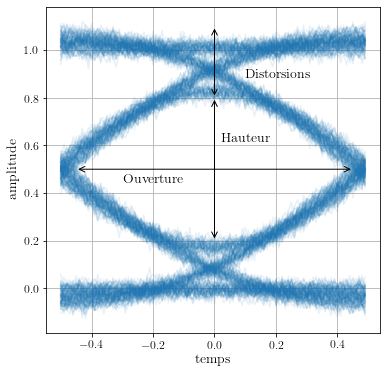

In [2]:
N = 400
d = 1
t = np.arange(0, N*d, d/100)

# Message
msg = rnd.randint(2, size=N)

# Signal émis
h = np.ones(100)
x = np.kron(msg, h)

# Signal reçu
g = sig.firwin(400, .01)
y = sig.lfilter(g, 1, x) \
  + rnd.normal(0, .02, x.shape)

# Diagramme de l'œil
plt.figure(figsize=(6,6))
cnf.eyediag(t, y, d, alpha=.1)
plt.xlabel('temps')
plt.ylabel('amplitude')

# Annotations
plt.text(-.2, .48, "Ouverture", ha="center", va="top")
plt.annotate('', xy=(-.45,.5), xytext=(.45,.5), arrowprops=dict(arrowstyle='<->'))
plt.text(0.02, .6, "Hauteur", ha="left", va="bottom")
plt.annotate('', xy=(0,0.2), xytext=(0,0.8), arrowprops=dict(arrowstyle='<->'))
plt.text(0.1, .87, "Distorsions", ha="left", va="bottom")
plt.annotate('', xy=(0,0.8), xytext=(0,1.1), arrowprops=dict(arrowstyle='<->'))

# Enregistrement
plt.savefig("diagoeil.svg")
plt.show()

## Exercice

In [3]:
# Amplitude et durée des formes d'onde
V, d = 1, 1

# Nombre de points par bit
L = 100

# "fréquence d'échantillonnage"
fe = L/d

# Taille des séquences M-aires
N = 100

### Diagramme de l'œil 1

$M = 2$, pas d'IES, pas de bruit

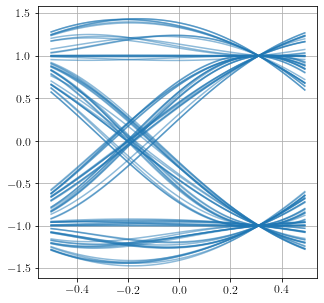

In [4]:
# Message
c = cnf.randmary(N,[1, 1])

# Modulation
alpha = 0.5
t, xc = cnf.mod_rrc(c, V, d, alpha)

# Canal
yc = cnf.channel(xc, np.inf, 0, d)

# Réception
tt = np.arange(-10, 10, 1/fe) - d
hc = cnf.rrc(tt, V, alpha)
hc = hc / np.sum(hc)
zc = np.convolve(yc, hc, 'same')

# Indices des points à représenter
idx = np.arange(2*L, N*L-2*L).astype("int")
delta = 30
    
# Diagramme de l'oeil
plt.figure(figsize=(5,5))
cnf.eyediag(t[idx], zc[idx-delta], d)
plt.savefig("eyediag1.svg")
plt.show()

### Diagramme de l'œil 2

M = 4, pas d'IES, pas de bruit

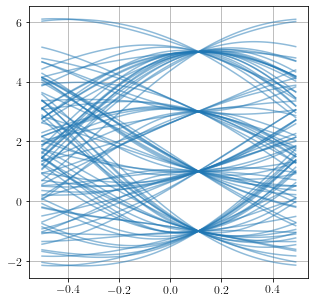

In [5]:
# Message
c = cnf.randmary(N,[1, 1, 1, 1])

# Modulation
alpha = 0.5
t, xc = cnf.mod_rrc(c, V, d, alpha)

# Canal
yc = cnf.channel(xc, np.inf, 0, d)

# Réception
tt = np.arange(-10, 10, 1/fe) - d
hc = cnf.rrc(tt, V, alpha)
hc = hc / np.sum(hc)
zc = np.convolve(yc, hc, 'same')

# Indices des points à représenter
idx = np.arange(2*L, N*L-2*L).astype("int")
delta = 10
    
# Diagramme de l'oeil
plt.figure(figsize=(5,5))
cnf.eyediag(t[idx], zc[idx-delta], d)
plt.savefig("eyediag2.svg")
plt.show()

### Diagramme de l'œil 3

M = 2, pas d'IES, bruit

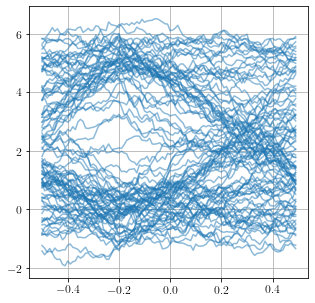

In [6]:
# Message
c = cnf.randmary(N,[1, 1])

# Modulation
t, xc = cnf.mod_d(c, V, d)
xc = (xc+1)*5/2

# Canal
yc = cnf.channel(xc, np.inf, 7, d)

# Réception
hc = np.ones(L)/L
zc = np.convolve(yc, hc, 'same')

# Indices des points à représenter
idx = np.arange(2*L, N*L-2*L).astype("int")
delta = -20
    
# Diagramme de l'oeil
plt.figure(figsize=(5,5))
cnf.eyediag(t[idx], zc[idx-delta], d)
plt.savefig("eyediag3.svg")
plt.show()

### Diagramme de l'œil 4

M = 2, IES, pas de bruit

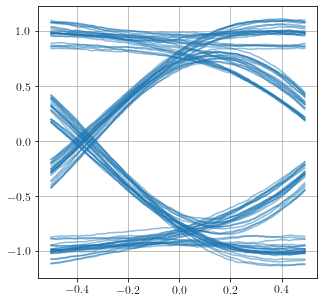

In [7]:
# Message
c = cnf.randmary(N,[1, 1])

# Modulation
t, xc = cnf.mod_d(c, V, d)

# Canal
yc = cnf.channel(xc, 1, .2, d)

# Réception
hc = np.ones(L)/L
zc = np.convolve(yc, hc, 'same')

# Indices des points à représenter
idx = np.arange(2*L, N*L-2*L).astype("int")
delta = 20
    
# Diagramme de l'oeil
plt.figure(figsize=(5,5))
cnf.eyediag(t[idx], zc[idx-delta], d)
plt.savefig("eyediag4.svg")
plt.show()